In [22]:
!pip install tensorflow --upgrade

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import pathlib
data_dir = pathlib.Path("./data")

In [4]:
image_count = len(list(data_dir.glob('*/*/*.jpg')))

In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir/"train",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7267 files belonging to 15 classes.


2022-01-17 17:55:49.525611: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir/"val",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1550 files belonging to 15 classes.


In [8]:
class_names = train_ds.class_names


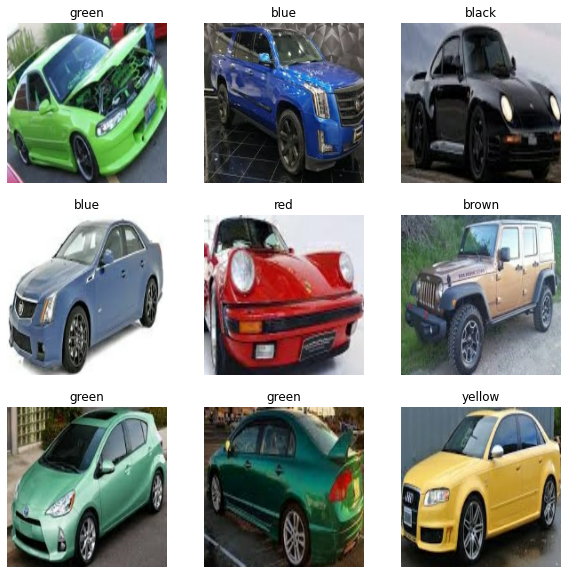

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

In [40]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [44]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
228/228 [==============================] - 308s 1s/step - loss: 1.3141 - accuracy: 0.5584 - val_loss: 0.9205 - val_accuracy: 0.6890
Epoch 2/10
228/228 [==============================] - 267s 1s/step - loss: 0.7586 - accuracy: 0.7423 - val_loss: 0.7666 - val_accuracy: 0.7123
Epoch 3/10
228/228 [==============================] - 314s 1s/step - loss: 0.5782 - accuracy: 0.8032 - val_loss: 0.6314 - val_accuracy: 0.7710
Epoch 4/10
228/228 [==============================] - 416s 2s/step - loss: 0.4667 - accuracy: 0.8431 - val_loss: 0.6112 - val_accuracy: 0.7845
Epoch 5/10
228/228 [==============================] - 321s 1s/step - loss: 0.3118 - accuracy: 0.8976 - val_loss: 0.6633 - val_accuracy: 0.7916
Epoch 6/10
228/228 [==============================] - 325s 1s/step - loss: 0.2015 - accuracy: 0.9377 - val_loss: 0.7190 - val_accuracy: 0.7852
Epoch 7/10
228/228 [==============================] - 320s 1s/step - loss: 0.1460 - accuracy: 0.9547 - val_loss: 0.8321 - val_accuracy: 0.7800

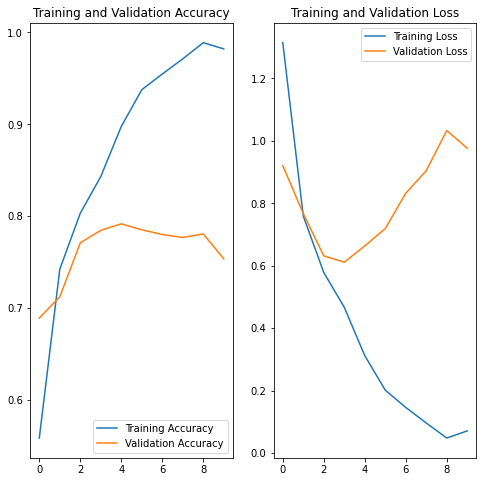

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
model.save("saved_model/my_model")

2022-01-14 16:27:34.572821: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/my_model/assets
